## Ритейл - Анализ программы лояльности

### Задача**:**

Проанализируйте программу лояльности магазина.

- Проведите исследовательский анализ данных;
- Проведите анализ программы лояльности;
- Сформулируйте и проверьте статистические гипотезы.

### Описание данных:

Датасет содержит данные о покупках в магазине строительных материалов «Строили, строили и наконец построили». Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

Файл retail_dataset.csv:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

Файл product_codes.csv:

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;

По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно **обязательно** в формате **pdf,** прикрепив ссылку на файл в основном проекте.

##  Декомпозиция


#### Шаг 1. Открыть файл с данными и изучить общую информацию

#### Шаг 2. Подготовить данные

Приведите данные к нужным типам;

Найдите и исправьте ошибки в данных.

Поясните, какие ошибки вы нашли и как их исправили. 

Решить обрабатывать ли эти нулевые значения

Посчитайте для каждого пользователя:

чек;

выручку;

количество товаров в корзине;

#### Шаг 3. Проанализировать данные


Разделить пользователей с картой лояльности и без. Построить графики количества товаров в корзине и тд

Описать поведение клиентов оператора, исходя из выборки. Построить графики. Описать гипотезу стат методами. 
Выбрать односторонняя или двусторонняя гипотезу


Гипотеза -  Отличается ли выручка (чаще или больше покупают) покупателей по программе лояльности или без

#### Шаг 4. Проверьте гипотезы

Выбрать пороговое значение alpha задайте самостоятельно.

Описать как формулировали нулевую и альтернативную гипотезы;

какой критерий использовали для проверки гипотез и почему.

#### Шаг 5. Напишите общий вывод

Оформление: Задание выполнитm в Jupyter Notebook и добавить презентацию


## Ссылка на дашборд

https://public.tableau.com/profile/tatiana2933#!/vizhome/dash_15997705520710/Dashboard1?publish=yes

## Ссылка на презентацию

https://yadi.sk/i/Pg-bIn0LiCtn_w

## Оглавление: 

#### 1. [Шаг 1. Открываю файлы с данными и изучию общую информацию](#step1)  
#### 2. [Шаг 2. Подготавливаю данные](#step2)  
#### 3. [Шаг 3. Исследовательский анализ данных](#step3)      
#### 4. [Средний чек](#step4) 
#### 5. [Средние количество товаров в чеке](#step5) 
#### 6. [Средняя выручка](#step6) 
#### 7. [Количество чеков на пользователя](#step7) 
#### 8. [Проверка статистической гипотезы](#step8) 
#### 9. [Шаг 5. Общий вывод](#step9)

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 1. Открываю файлы с данными и изучию общую информацию</h1><a id="step1"></a>   
</div>

In [381]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

product_codes = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/VNiABso4xD44UQ')
product_codes.head(5)

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


In [382]:
product_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
productID        9969 non-null object
price_per_one    9969 non-null float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [383]:
product_codes.describe()

,price_per_one
count,9969.000000
mean,19.503697
std,330.880754
min,0.000000
25%,1.250000
50%,2.550000
75%,5.510000
max,16888.020000


In [384]:
retail_dataset = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://yadi.sk/d/SKmLQSQUq-ezAA')
retail_dataset.head(5)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [385]:
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         105335 non-null object
item_ID            105335 non-null object
Quantity           105335 non-null int64
purchasedate       105335 non-null object
CustomerID         69125 non-null float64
ShopID             105335 non-null object
loyalty_program    105335 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [386]:
retail_dataset['purchasedate_new'] = pd.to_datetime(retail_dataset['purchasedate'], format='%Y.%m.%d %H:%M:%S')
retail_dataset['loyalty_program'] = retail_dataset['loyalty_program'].astype('int')
retail_dataset.head(5)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program,purchasedate_new
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10 12:50:00
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14 14:11:00
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14 13:50:00
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09 15:33:00
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13 14:40:00


In [387]:
retail_dataset.isna().sum()

purchaseid              0
item_ID                 0
Quantity                0
purchasedate            0
CustomerID          36210
ShopID                  0
loyalty_program         0
purchasedate_new        0
dtype: int64

In [388]:
retail_dataset.duplicated().sum()

1033

In [389]:
retail_dataset = retail_dataset.drop_duplicates().reset_index(drop = True)
retail_dataset.duplicated().sum()

0

In [390]:
retail_dataset.describe()

,Quantity,CustomerID,loyalty_program
count,104302.000000,68154.000000,104302.000000
mean,7.883003,21011.165889,0.224464
std,329.565540,1766.665163,0.417231
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19533.000000,0.000000
50%,2.000000,20977.000000,0.000000
75%,7.000000,22633.000000,0.000000
max,74214.000000,23962.000000,1.000000


<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 2. Подготавливаю данные</h1><a id="step2"></a>   
</div>  

In [391]:
product_codes['productID'].nunique()

3159

In [392]:
product_codes['price_per_one'].count()

9969

In [393]:
product_codes.loc[product_codes['price_per_one'] != 0].count()

productID        9587
price_per_one    9587
dtype: int64

In [394]:
dubl = product_codes.groupby('productID')['price_per_one'].nunique().reset_index()
dubl.query('price_per_one!=1').count()

productID        2494
price_per_one    2494
dtype: int64

In [395]:
new_product_codes = product_codes.groupby('productID')['price_per_one'].mean()
new_product_codes

productID
10002            1.380
10080            0.850
10120            0.210
10123C           0.650
10124A           0.420
                 ...  
gift_0001_20    16.845
gift_0001_30    25.265
gift_0001_40    34.040
gift_0001_50    42.550
m                2.550
Name: price_per_one, Length: 3159, dtype: float64

#### ОБЪЕДИНЕНИЕ ДАТАФРЕЙМОВ

In [396]:
df = retail_dataset.merge(new_product_codes, left_on='item_ID', right_on='productID', how='left', validate='m:1')
df

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program,purchasedate_new,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10 12:50:00,1.810000
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14 14:11:00,2.766667
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14 13:50:00,1.474000
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09 15:33:00,4.300000
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13 14:40:00,7.013636
...,...,...,...,...,...,...,...,...,...
104297,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0,2016-12-13 11:21:00,2.073333
104298,540247,21742,0,2017-01-05 15:56:00,21143.0,Shop 0,0,2017-01-05 15:56:00,9.335000
104299,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,2016-12-09 14:05:00,11.368000
104300,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,2016-12-10 11:33:00,0.700000


In [397]:
df = df.loc[df['Quantity'] != 0]

In [398]:
df['month'] = df['purchasedate_new'].values.astype('datetime64[M]')
df['day'] = df['purchasedate_new'].values.astype('datetime64[D]')
df['price_per_all'] = df['Quantity']*df['price_per_one']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [399]:
df.groupby(['ShopID', 'loyalty_program' ])['purchaseid'].nunique().sort_values(ascending = False)

ShopID   loyalty_program
Shop 0   0                  2987
         1                  1324
Shop 4   0                   113
Shop 1   0                    89
Shop 6   0                    46
Shop 12  0                    21
Shop 2   0                    19
Shop 8   0                    18
Shop 3   0                    15
Shop 10  0                    15
Shop 7   0                    11
Shop 11  0                    10
Shop 18  0                     7
Shop 14  0                     5
Shop 20  0                     4
Shop 13  0                     4
Shop 16  0                     4
Shop 19  1                     4
Shop 9   0                     4
Shop 22  0                     4
Shop 5   0                     4
Shop 19  0                     3
Shop 21  0                     3
Shop 8   1                     2
Shop 23  0                     2
Shop 17  0                     2
Shop 15  0                     2
Shop 24  0                     1
Shop 25  0                     1
Shop 26  0        

In [1]:
x1 = df[df['loyalty_program'] == 0]
x1 = x1.groupby('ShopID')['purchaseid'].nunique().reset_index()
x1.columns = ['ShopID', 'non_loyal_purchases']

x2 = df[df['loyalty_program'] == 1]
x2 = x2.groupby('ShopID')['purchaseid'].nunique().reset_index()
x2.columns = ['ShopID', 'loyal_purchases']

x3 = x1.merge(x2, on = 'ShopID', how = 'outer')
x3.fillna(0, inplace=True)
x3

x3.set_index('ShopID').sort_index().plot.bar(stacked=True)


NameError: name 'df' is not defined

Заменим пользователей без CustomerID на 0

In [401]:
df['CustomerID'] = df['CustomerID'].fillna(value=0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [402]:
data = df.groupby(['ShopID', 'loyalty_program','purchaseid','CustomerID', 'month']).agg({'price_per_all': 'sum', 'Quantity': 'sum'}).reset_index()
data

,ShopID,loyalty_program,purchaseid,CustomerID,month,price_per_all,Quantity
0,Shop 0,0,536367,18726.0,2016-12-01,295.588750,71
1,Shop 0,0,536368,18726.0,2016-12-01,84.470000,11
2,Shop 0,0,536369,18726.0,2016-12-01,16.600000,2
3,Shop 0,0,536371,19427.0,2016-12-01,402.900000,79
4,Shop 0,0,536374,20779.0,2016-12-01,381.222500,31
...,...,...,...,...,...,...,...
4724,Shop 8,1,541576,22776.0,2017-01-01,145.204333,25
4725,Shop 9,0,536971,18458.0,2016-12-01,456.877500,132
4726,Shop 9,0,541267,18458.0,2017-01-01,1130.346750,263
4727,Shop 9,0,543214,18458.0,2017-02-01,487.220071,89


In [403]:
data.groupby(['ShopID', 'loyalty_program' ])['price_per_all'].mean().sort_values( ascending = False)

ShopID   loyalty_program
Shop 3   0                  6931.733496
Shop 14  0                  4559.322584
Shop 24  0                  3917.850417
Shop 25  0                  3150.084238
Shop 26  0                  2768.059155
Shop 19  1                  2203.794095
Shop 2   0                  2126.806811
Shop 27  0                  2114.421024
Shop 5   0                  1534.229244
Shop 28  1                  1466.012385
Shop 6   0                  1229.039682
Shop 17  0                  1116.094714
Shop 7   0                  1010.495824
Shop 16  0                   935.180045
Shop 18  0                   891.783759
Shop 8   0                   885.192148
Shop 15  0                   859.181012
Shop 30  0                   742.511667
Shop 22  0                   726.740357
Shop 10  0                   655.094763
Shop 13  0                   610.849917
Shop 9   0                   605.307613
Shop 1   0                   534.829826
Shop 0   1                   461.899199
Shop 4   0     

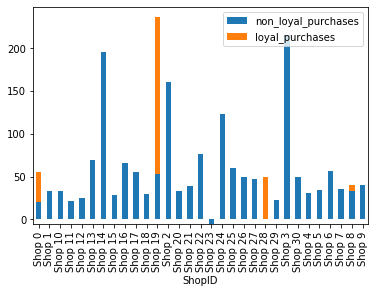

In [404]:
x4 = df[df['loyalty_program'] == 0]
x4 = x4.groupby('ShopID')['price_per_all'].mean().reset_index()
x4.columns = ['ShopID', 'non_loyal_purchases']

x5 = df[df['loyalty_program'] == 1]
x5 = x5.groupby('ShopID')['price_per_all'].mean().reset_index()
x5.columns = ['ShopID', 'loyal_purchases']

x6 = x4.merge(x5, on = 'ShopID', how = 'outer')
x6.fillna(0, inplace=True)
x6

x6.set_index('ShopID').sort_index().plot.bar(stacked=True)

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 3. Исследовательский анализ данных</h1> <a id="step3"></a>   
</div>  

In [405]:
count_month = data.groupby(['CustomerID'])['month'].nunique().reset_index()
count_month.rename(columns={'month': 'cost_cart_loyal'}, inplace=True)
count_month['cost_cart_loyal'] = count_month['cost_cart_loyal']*200
count_month

,CustomerID,cost_cart_loyal
0,0.0,600
1,18025.0,200
2,18026.0,400
3,18027.0,400
4,18029.0,200
...,...,...
1736,23938.0,200
1737,23939.0,400
1738,23948.0,200
1739,23956.0,200


In [406]:
data = data.merge(count_month, left_on='CustomerID', right_on='CustomerID', how='left', validate='m:1')
data

,ShopID,loyalty_program,purchaseid,CustomerID,month,price_per_all,Quantity,cost_cart_loyal
0,Shop 0,0,536367,18726.0,2016-12-01,295.588750,71,600
1,Shop 0,0,536368,18726.0,2016-12-01,84.470000,11,600
2,Shop 0,0,536369,18726.0,2016-12-01,16.600000,2,600
3,Shop 0,0,536371,19427.0,2016-12-01,402.900000,79,200
4,Shop 0,0,536374,20779.0,2016-12-01,381.222500,31,400
...,...,...,...,...,...,...,...,...
4724,Shop 8,1,541576,22776.0,2017-01-01,145.204333,25,400
4725,Shop 9,0,536971,18458.0,2016-12-01,456.877500,132,600
4726,Shop 9,0,541267,18458.0,2017-01-01,1130.346750,263,600
4727,Shop 9,0,543214,18458.0,2017-02-01,487.220071,89,600


#### Возьмем только shop 0

In [407]:
shop0 = data.query('ShopID == "Shop 0"')

In [408]:
shop0.describe()

,loyalty_program,CustomerID,price_per_all,Quantity,cost_cart_loyal
count,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000
mean,0.307121,18110.800974,364.990793,153.613547,426.212016
std,0.461354,7623.862765,2415.385940,1647.696035,171.494077
min,0.000000,0.000000,-77184.640000,-74216.000000,200.000000
25%,0.000000,19008.000000,14.648750,4.000000,200.000000
50%,0.000000,20718.000000,207.073421,69.000000,400.000000
75%,1.000000,22405.000000,487.686940,176.000000,600.000000
max,1.000000,23962.000000,77182.560000,74214.000000,600.000000


In [409]:
shop0.quantile(q=0.01)

loyalty_program      0.00000
CustomerID           0.00000
price_per_all     -735.56925
Quantity          -145.00000
cost_cart_loyal    200.00000
Name: 0.01, dtype: float64

In [410]:
shop0.quantile(q=0.99)

loyalty_program        1.000000
CustomerID         23901.600000
price_per_all       4209.498314
Quantity            1696.200000
cost_cart_loyal      600.000000
Name: 0.99, dtype: float64

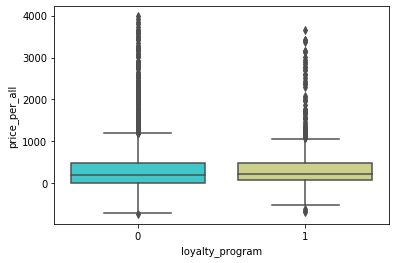

In [411]:
sns.boxplot(x="loyalty_program", y="price_per_all", data=shop0.query('price_per_all < 4000.0 and price_per_all > -735.0'), palette='rainbow')

Распределение чека с лояльностью и без похожее. Много выбросов.25% и 75% квантили находятся рядом 0 500 соответствено. Если выкинуть выбросы - распределение похоже. 

In [455]:
shop0 = shop0.query('price_per_all < 2000 and price_per_all > -735.0 and Quantity < 800 and Quantity> -100 ')

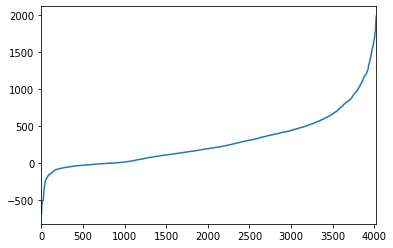

In [456]:
shop0['price_per_all'].sort_values().reset_index(drop=True).plot()

<p style="font-family: verdana; color: orange">Поясни, пожалуйста, как ты читаешь эти графики. Что на них видишь, какие выводы можешь по ним сделать. Потому что для меня это не очень очевидно.</p>

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px"> СРЕДНЕЙ ЧЕК</h1> <a id="step4"></a>   
</div>  

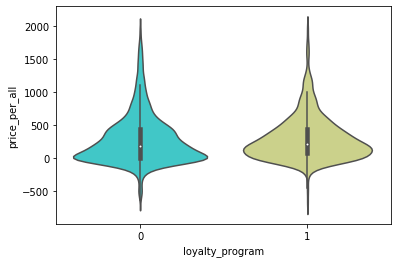

In [457]:
sns.violinplot(x="loyalty_program", y="price_per_all", data=shop0, palette='rainbow')

In [458]:
shop0.groupby(['loyalty_program'])['price_per_all'].mean()

loyalty_program
0    285.470234
1    301.825340
Name: price_per_all, dtype: float64

In [459]:
shop0_1 = shop0.query('loyalty_program==1 ')
shop0_0 = shop0.query('loyalty_program==0 ')

Неавторизованные пользователи

In [460]:
shop0_0.query('CustomerID==0')['price_per_all'].mean()

121.95258393815426

Авторизованные пользователи

In [461]:
shop0_0.query('CustomerID!=0')['price_per_all'].mean()

324.6058014363788

In [462]:
shop0.query('loyalty_program==1').groupby('CustomerID')['month'].nunique().mean()

1.4493006993006994

пересчитаем с ограничением по quantity

In [463]:
shop0.query('Quantity < 800 and Quantity> -100 ').groupby(['loyalty_program'])['price_per_all'].mean()

loyalty_program
0    285.470234
1    301.825340
Name: price_per_all, dtype: float64

In [464]:
shop0.query('Quantity < 800 and Quantity> -100 and CustomerID!=0 and loyalty_program==0')['price_per_all'].mean()

324.6058014363788

In [465]:
shop0.query('Quantity < 800 and Quantity> -100 and CustomerID==0 and loyalty_program==0')['price_per_all'].mean()

121.95258393815426

In [466]:
from scipy import stats as st
alpha = .05
# задаем критический уровень статистической значимости

loyalnost = shop0_1['price_per_all']
other = shop0_0['price_per_all']
results = st.ttest_ind(loyalnost, other)
#  проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
   

p-значение: 0.18860368016514414
Не получилось отвергнуть нулевую гипотезу


<div style=" padding: 20px"> <h1 style=" margin-bottom:20px"> СРЕДНИЕ КОЛИЧЕСТВО ТОВАРОВ В ЧЕКЕ</h1> <a id="step5"></a>   
</div>  

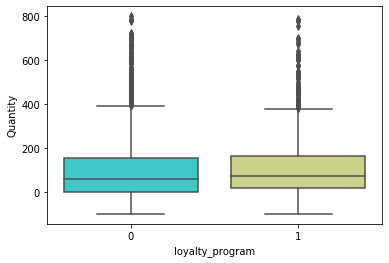

In [467]:
sns.boxplot(x="loyalty_program", y="Quantity", data=shop0, palette='rainbow')

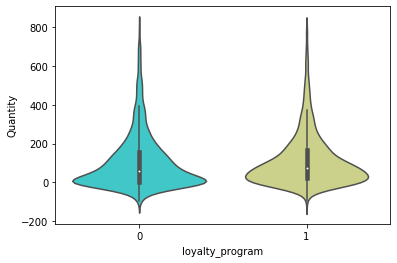

In [468]:
sns.violinplot(x="loyalty_program", y="Quantity", data=shop0.query('Quantity < 800 and Quantity> -100'), palette='rainbow')

In [469]:
shop0 = shop0.query('Quantity < 800 and Quantity> -100')

In [470]:
shop0.groupby(['loyalty_program'])['Quantity'].mean()

loyalty_program
0    106.540217
1    113.962055
Name: Quantity, dtype: float64

Неавторизованные пользователи

In [471]:
shop0_0.query('CustomerID==0')['Quantity'].mean()

53.53658536585366

Авторизованные пользователи

In [472]:
shop0_0.query('CustomerID!=0')['Quantity'].mean()

119.22586439155815

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px"> СРЕДНЯЯ ВЫРУЧКА</h1> <a id="step6"></a>   
</div>   

In [501]:
revenue = shop0.groupby(['CustomerID', 'cost_cart_loyal', 'loyalty_program']).agg({'price_per_all': 'sum', 'purchaseid': 'nunique'}).reset_index()
revenue['total'] = revenue['cost_cart_loyal'] +  revenue['price_per_all']
revenue

,CustomerID,cost_cart_loyal,loyalty_program,price_per_all,purchaseid,total
0,0.0,600,0,65000.727239,533,65600.727239
1,18426.0,400,0,1701.086250,3,2101.086250
2,18427.0,600,0,5580.897375,35,6180.897375
3,18499.0,200,0,252.210476,1,452.210476
4,18502.0,200,0,852.635000,2,1052.635000
...,...,...,...,...,...,...
1528,23938.0,200,1,511.486111,1,711.486111
1529,23939.0,400,1,911.191824,3,1311.191824
1530,23948.0,200,1,162.555000,2,362.555000
1531,23956.0,200,1,-28.956667,1,171.043333


In [502]:
average_revenue_1 = revenue.query('loyalty_program==1')['total'].sum() / revenue.query('loyalty_program==1')['CustomerID'].nunique()
average_revenue_1

959.4563910585671

Авторизованные пользователи

In [504]:
frame_0_notNan = revenue.query('loyalty_program==0 and CustomerID!=0')
average_revenue_0 = (frame_0_notNan['price_per_all'].sum() / frame_0_notNan['CustomerID'].nunique()) 
average_revenue_0

753.0178331237662

In [505]:
(average_revenue_1/average_revenue_0-1)*100

27.41482988237154

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px"> КОЛИЧЕСТВО ЧЕКОВ НА ПОЛЬЗОВАТЕЛЯ</h1> <a id="step7"></a>   
</div>  

In [506]:
dash1 = df.query('ShopID=="Shop 0"').groupby(['loyalty_program','purchaseid','CustomerID', 'day']).agg({'price_per_all': 'sum'}).reset_index()
dash1 = dash1.query('CustomerID!=0').groupby(['loyalty_program','CustomerID', 'day']).agg({'purchaseid': 'nunique'}).reset_index()
dash1

,loyalty_program,CustomerID,day,purchaseid
0,0,18025.0,2017-01-18,2
1,0,18426.0,2016-12-05,1
2,0,18426.0,2016-12-13,1
3,0,18426.0,2017-01-20,1
4,0,18427.0,2016-12-05,7
...,...,...,...,...
3194,1,23948.0,2016-12-16,1
3195,1,23956.0,2017-01-25,1
3196,1,23962.0,2017-01-06,1
3197,1,23962.0,2017-01-23,1


In [507]:
dash = dash1.query('CustomerID!=0')
dash

,loyalty_program,CustomerID,day,purchaseid
0,0,18025.0,2017-01-18,2
1,0,18426.0,2016-12-05,1
2,0,18426.0,2016-12-13,1
3,0,18426.0,2017-01-20,1
4,0,18427.0,2016-12-05,7
...,...,...,...,...
3194,1,23948.0,2016-12-16,1
3195,1,23956.0,2017-01-25,1
3196,1,23962.0,2017-01-06,1
3197,1,23962.0,2017-01-23,1


In [508]:
dash.to_csv('C:\\practicum\\dash.csv', sep=',', encoding='utf-8', header='true')

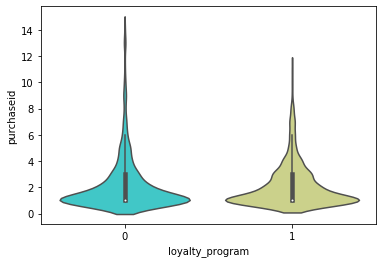

In [509]:
sns.violinplot(x="loyalty_program", y="purchaseid", data=revenue.query('CustomerID!=0 and purchaseid< 15'), palette='rainbow')

In [511]:
revenue.query('CustomerID!=0').groupby(['loyalty_program'])['purchaseid'].mean()

loyalty_program
0    2.319792
1    2.211538
Name: purchaseid, dtype: float64

In [512]:
revenue_purch_0 = revenue.query('CustomerID!=0 and loyalty_program==0')
revenue_purch_0['purchaseid'].mean()

2.3197916666666667

In [513]:
revenue_purch_1 = revenue.query('CustomerID!=0 and loyalty_program==1')
revenue_purch_1['purchaseid'].mean()

2.2115384615384617

In [514]:
from scipy import stats as st
alpha = .05
# задаем критический уровень статистической значимости

loyalnost = revenue_purch_1['purchaseid']
other = revenue_purch_0['purchaseid']
results = st.ttest_ind(loyalnost, other)
#  проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
   

p-значение: 0.4532742667472742
Не получилось отвергнуть нулевую гипотезу


In [515]:
revenue.groupby(['loyalty_program'])['CustomerID'].nunique()

loyalty_program
0    961
1    572
Name: CustomerID, dtype: int64

Карта лояльности на количество чеков не влияет. 

In [516]:
revenue_stat = revenue[revenue['CustomerID'] == revenue['CustomerID']]
revenue_stat_1 = revenue_stat.query('loyalty_program==1')
revenue_stat_0 = revenue_stat.query('loyalty_program==0 and CustomerID!=0')

<div style=" padding: 20px"> <h1 style=" margin-bottom:20px"> Проверим гипотезу о равенстве средних двух независимых совокупностей.</h1> <a id="step8"></a>   
</div> 

Проверяем гипотезу о равенстве средних двух независимых совокупностей (выручки)

In [517]:
from scipy import stats as st
alpha = .05
# задаем критический уровень статистической значимости

loyalnost = revenue_stat_1['total']
other = revenue_stat_0['price_per_all']
results = st.ttest_ind(loyalnost, other)
#  проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
   

p-значение: 0.00037719328855014407
Отвергаем нулевую гипотезу


<div style=" padding: 20px"> <h1 style=" margin-bottom:20px">Шаг 5. Общий вывод</h1><a id="step9"></a>   
</div>

ИТОГО:
Выручка по клиентам с картой лояльности – значимо выше (27%), при том что средний чек – на 7% меньше (скидки)
Частота покупок с/без картой лояльности – одинаковая, количество товаров в чеке – одинаковая

Необходимо посчитать % отказов  от использования картой лояльности за длинный период. Текущая программа лояльности повышает выручку с клиента, но не мотивирует его совершать покупки чаще.
Если % отказов окажется большим – следует пересмотреть текущую систему лояльности.
